Symbolic Classification

This will be turned into a template without needing to specify the configuration files

0.9856429463171036


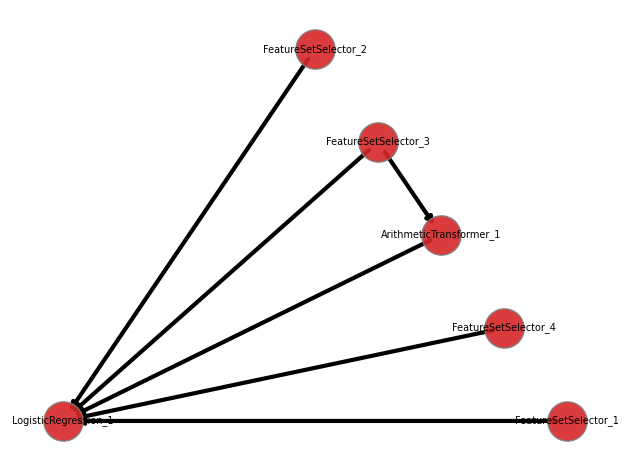

In [1]:
import tpot2
import sklearn.datasets
from sklearn.linear_model import LogisticRegression
import numpy as np
def params_LogisticRegression(trial, name=None):
    param_grid = { 
                  'penalty': trial.suggest_categorical(name=f'penalty_{name}', choices=[None]),
                  'tol': 0.01,
                  }
    return param_grid

root_config_dict =  {LogisticRegression: params_LogisticRegression}



est = tpot2.TPOTEstimator(population_size=20,generations=10, 
                            scorers=['roc_auc_ovr'],
                            scorers_weights=[1],
                            classification=True,
                            inner_config_dict= "arithmetic_transformer",
                            leaf_config_dict="feature_set_selector",
                            root_config_dict=root_config_dict,
                            )

#load iris
scorer = sklearn.metrics.get_scorer('roc_auc_ovo')
X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25)
est.fit(X_train, y_train)
print(scorer(est, X_test, y_test))
est.fitted_pipeline_.plot()

Symbolic Regression

-3561.298640877408


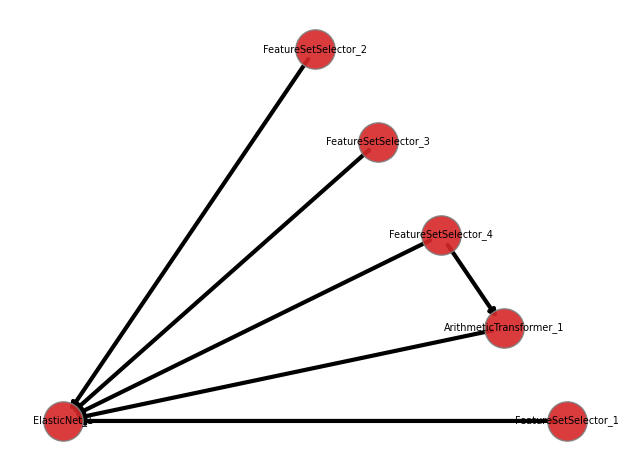

In [2]:
import tpot2
import sklearn.datasets
from sklearn.linear_model import ElasticNet
import numpy as np
def params_ElasticNet(trial, name=None):
    param_grid = { 
                  'alpha': trial.suggest_float(f'alpha_{name}', 0.001, 1.0, log=True),
                  'tol': 0.01,
                  }
    return param_grid

root_config_dict =  {ElasticNet: params_ElasticNet}



est = tpot2.TPOTEstimator(population_size=20,generations=5,
                            scorers=['neg_mean_squared_error'],
                            scorers_weights=[1],
                            n_jobs=1,
                            classification=False,
                            inner_config_dict= "arithmetic_transformer",
                            leaf_config_dict="feature_set_selector",
                            root_config_dict=root_config_dict,
                            )


scorer = sklearn.metrics.get_scorer('neg_mean_squared_error')
X, y = sklearn.datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25)
est.fit(X_train, y_train)
print(scorer(est, X_test, y_test))
est.fitted_pipeline_.plot()